In [1]:
import pandas as pd

data = pd.read_csv('/home/degottardiraphael/MasterThesis/Benchmarking pipeline/Scores/Spurious Coexpression/spurious_rel_coexpr_first.csv')

In [2]:
import numpy as np

cutoffs = {}
removals = {}

cleaned_data = data.copy()

for col in cleaned_data.columns:
    # Remove zeros
    nonzero = cleaned_data[cleaned_data[col] != 0][col]
    zeros_removed = cleaned_data.shape[0] - nonzero.shape[0]
    
    # Calculate outlier cutoffs (using 1.5*IQR rule)
    Q1 = nonzero.quantile(0.25)
    Q3 = nonzero.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Remove outliers
    filtered = nonzero[(nonzero >= lower) & (nonzero <= upper)]
    outliers_removed = nonzero.shape[0] - filtered.shape[0]
    
    # Store cutoffs and removals
    cutoffs[col] = {'lower': lower, 'upper': upper}
    removals[col] = {'zeros_removed': zeros_removed, 'outliers_removed': outliers_removed}
    
    # Update the column in cleaned_data
    cleaned_data = cleaned_data.loc[filtered.index]

# Report cutoffs and removals
for col in data.columns:
    print(f"{col}:")
    print(f"  Outlier cutoffs: lower={cutoffs[col]['lower']:.4f}, upper={cutoffs[col]['upper']:.4f}")
    print(f"  Zeros removed: {removals[col]['zeros_removed']}")
    print(f"  Outliers removed: {removals[col]['outliers_removed']}\n")

ENACT:
  Outlier cutoffs: lower=-0.7907, upper=4.6019
  Zeros removed: 9442
  Outliers removed: 10602

B2C:
  Outlier cutoffs: lower=-1.6676, upper=5.3739
  Zeros removed: 13889
  Outliers removed: 10594

Xseg:
  Outlier cutoffs: lower=-1.4102, upper=4.6544
  Zeros removed: 17014
  Outliers removed: 8146

16x16:
  Outlier cutoffs: lower=-1.2630, upper=5.2041
  Zeros removed: 2702
  Outliers removed: 6403

8x8:
  Outlier cutoffs: lower=-1.1728, upper=4.2899
  Zeros removed: 8538
  Outliers removed: 5140



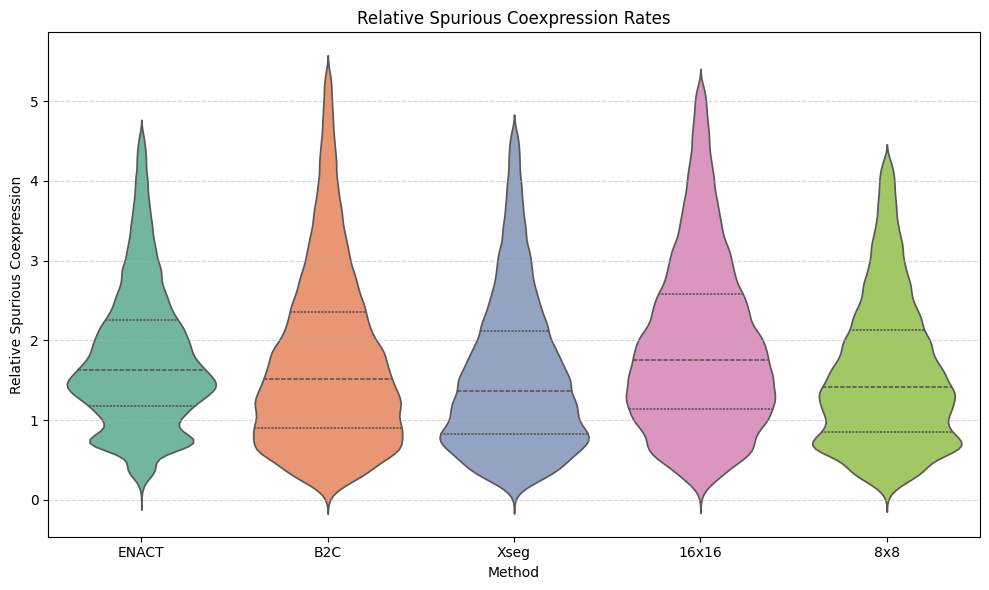

In [4]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.violinplot(data=cleaned_data, palette="Set2", inner="quartile")
plt.title("Relative Spurious Coexpression Rates")
plt.xlabel("Method")
plt.ylabel("Relative Spurious Coexpression")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()